<a href="https://colab.research.google.com/github/Seogury/Section2_project-/blob/main/Section2_Project_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 데이터(축구평점)

In [179]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [260]:
df = pd.read_csv('/content/drive/My Drive/data_football_ratings.csv')

ai = (df['is_human'] == 0)
df_ai = df[ai]
df.drop(index = df_ai.index, axis = 0, inplace = True)


In [181]:
df_ai.shape, df.shape

((23756, 63), (26896, 63))

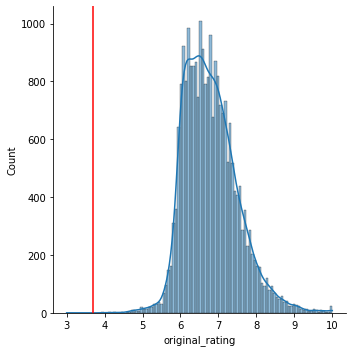

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(df_ai['original_rating'],kde=True);
plt.axvline(3.7, color='red');

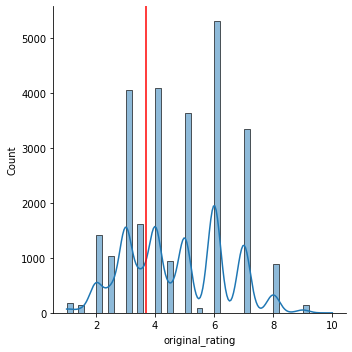

In [183]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(df['original_rating'],kde=True);
plt.axvline(3.7, color='red');

In [261]:
df

,competition,date,match,team,pos,pos_role,player,rater,is_human,original_rating,...,betweenness_centrality,closeness_centrality,flow_centrality,flow_success,betweenness2goals,win,lost,is_home_team,minutesPlayed,game_duration
0,Euro 2016,10/06/2016,"France - Romania, 2 - 1",Romania,DF,DC,Dragos Grigore,Kicker,1,3.5,...,0.143055,0.603571,0.304348,0.000000,0.000000,0,1,0,90,90
4,Euro 2016,10/06/2016,"France - Romania, 2 - 1",Romania,MF,DMC,Mihai Pintilii,Kicker,1,3.5,...,0.333284,0.710084,0.347826,0.675075,0.000000,0,1,0,90,90
9,Euro 2016,10/06/2016,"France - Romania, 2 - 1",France,FW,FW,Olivier Giroud,Kicker,1,3.0,...,0.316015,0.754464,0.315068,1.090213,0.050000,1,0,1,90,90
10,Euro 2016,10/06/2016,"France - Romania, 2 - 1",Romania,DF,DL,Razvan Rat,Kicker,1,4.5,...,0.321679,0.754464,0.478261,0.000000,0.000000,0,1,0,90,90
15,Euro 2016,10/06/2016,"France - Romania, 2 - 1",France,MF,MC,Blaise Matuidi,Kicker,1,4.0,...,0.307731,0.754464,0.520548,1.315471,0.000000,1,0,1,90,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50642,World Cup 2018,15/07/2018,"France - Croatia, 4 - 2",Croatia,MF,MC,Ivan Rakitic,Kicker,1,2.5,...,0.244549,0.791209,0.538462,1.096226,0.000000,0,1,0,90,90
50643,World Cup 2018,15/07/2018,"France - Croatia, 4 - 2",Croatia,MF,MC,Ivan Rakitic,SkySports,1,7.0,...,0.244549,0.791209,0.538462,1.096226,0.000000,0,1,0,90,90
50646,World Cup 2018,15/07/2018,"France - Croatia, 4 - 2",Croatia,MF,ML,Ivan Perisic,Kicker,1,2.0,...,0.172090,0.791209,0.318681,0.794142,0.045455,0,1,0,90,90
50647,World Cup 2018,15/07/2018,"France - Croatia, 4 - 2",Croatia,MF,ML,Ivan Perisic,SkySports,1,8.0,...,0.172090,0.791209,0.318681,0.794142,0.045455,0,1,0,90,90


#2. Feature engineering

In [262]:
def engineer(df):
  

  df['original_rating'] = df['original_rating'].apply(lambda x : int(x))

  # 평점사 및 포지션 GK 제거
  con_rater = (df['rater'] == 'Kicker') | (df['rater']== 'Bild') | (df['pos']=='GK')
  df.drop(index = df[con_rater].index, axis = 0,inplace = True)
  
  #타겟 만들기
  bins = [0,8,11]
  labels = [0, 1]
  df['Grade'] = pd.cut(df['original_rating'], bins, right=False, labels=labels)

  #특성추가
  df['pass_acc'] = df['passes_acc']/ (df['passes_acc']+df['passes_inacc'])
  df['cross_acc'] = df['crosses_acc']/ (df['crosses_acc']+df['crosses_inacc'])
 
  #결측치 0으로 처리
  df['cross_acc'] = df['cross_acc'].fillna(0)
  df['pass_acc'] = df['pass_acc'].fillna(0)

  # 특성 제거(골키퍼, 매치데이터, 팀)
  df.drop(['goals_ag_otb','goals_ag_itb', 'saves_itb', 'saves_otb', 'saved_pen',
           'competition','date','match', 'player','team','is_home_team', 'pos',
           'minutesPlayed','game_duration','is_human','rater','win','lost'
           , 'pos_role','original_rating'], axis = 1,inplace = True)

  return df


In [263]:
#적용
df = engineer(df)
df_ai = engineer(df_ai)

In [264]:
#결측치 확인, 범주값 확인
df.isnull().sum(), df.nunique()

(goals                     0
 assists                   0
 shots_ontarget            0
 shots_offtarget           0
 shotsblocked              0
 chances2score             0
 drib_success              0
 drib_unsuccess            0
 keypasses                 0
 touches                   0
 passes_acc                0
 passes_inacc              0
 crosses_acc               0
 crosses_inacc             0
 lballs_acc                0
 lballs_inacc              0
 grduels_w                 0
 grduels_l                 0
 aerials_w                 0
 aerials_l                 0
 poss_lost                 0
 fouls                     0
 wasfouled                 0
 clearances                0
 stop_shots                0
 interceptions             0
 tackles                   0
 dribbled_past             0
 tballs_acc                0
 tballs_inacc              0
 ycards                    0
 rcards                    0
 dangmistakes              0
 countattack               0
 offsides     

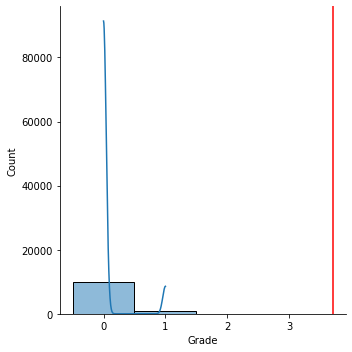

In [265]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(df['Grade'],kde=True);
plt.axvline(3.7, color='red');

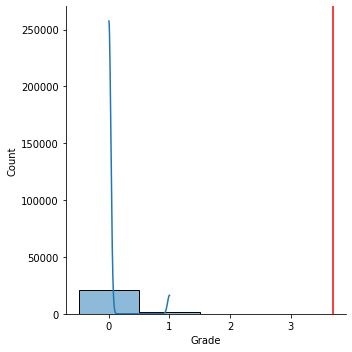

In [266]:
sns.displot(df_ai['Grade'],kde=True);
plt.axvline(3.7, color='red');

In [267]:
df

,goals,assists,shots_ontarget,shots_offtarget,shotsblocked,chances2score,drib_success,drib_unsuccess,keypasses,touches,...,owngoals,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,flow_success,betweenness2goals,Grade,pass_acc,cross_acc
74,0,0,0,1,1,0,0,1,0,12,...,0,0.857143,0.080159,0.635338,0.096386,0.552186,0.000000,0,0.833333,0.000000
77,1,0,3,0,0,3,2,1,0,45,...,0,1.384615,0.230670,0.852071,0.328571,0.783747,0.000000,1,0.666667,0.000000
84,0,1,1,1,0,2,1,1,0,66,...,0,1.769231,0.351351,0.852071,0.485714,0.504938,0.033333,1,0.840909,0.000000
91,0,0,0,0,0,0,0,0,0,44,...,0,1.307692,0.162511,0.692308,0.328571,0.947050,0.000000,0,0.833333,0.333333
107,0,1,0,3,0,3,1,1,0,47,...,0,1.357143,0.189846,0.670635,0.253012,1.648864,0.058824,0,0.843750,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50635,0,0,0,2,0,1,0,0,0,84,...,0,1.615385,0.393516,0.852071,0.505495,1.186491,0.000000,0,0.910714,0.333333
50639,1,0,1,0,0,0,0,0,0,47,...,1,1.307692,0.154914,0.738462,0.351648,1.104371,0.000000,0,0.740741,1.000000
50643,0,0,0,3,1,1,0,1,3,91,...,0,1.692308,0.244549,0.791209,0.538462,1.096226,0.000000,0,0.838710,0.250000
50647,1,0,1,1,1,2,0,0,0,58,...,0,1.384615,0.172090,0.791209,0.318681,0.794142,0.045455,1,0.730769,0.111111


#모델

In [189]:
from sklearn.model_selection import train_test_split

#타겟, 피쳐 나누기
def split(df):
  #타겟
  target = 'Grade'
  
  y = df[target]
  X = df.drop(target , axis = 1)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 3)
  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 3)

  return X_train, X_test, X_val, y_train, y_test, y_val


In [190]:
#split 적용
X_train, X_test, X_val, y_train, y_test, y_val = split(df)
X_train_ai, X_test_ai, X_val_ai, y_train_ai, y_test_ai, y_val_ai = split(df_ai)

In [191]:
X_train.shape, X_test.shape, X_val.shape

((6993, 45), (2186, 45), (1749, 45))

In [192]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score

#기준 모델(최빈값)
y_pred = [y_train.mode()[0]] * len(y_train)
Accuracy = accuracy_score(y_train, y_pred)
print('Accuracy_score : ' , Accuracy)


Accuracy_score :  0.9136279136279136


In [193]:
#기준 모델(최빈값)
y_pred_ai = [y_train_ai.mode()[0]] * len(y_train_ai)
Accuracy1 = accuracy_score(y_train_ai, y_pred_ai)

print('기준모델_최빈값')
print('hu_Accuracy_score : ' , Accuracy)
print('ai_Accuracy_score : ' , Accuracy1)


기준모델_최빈값
hu_Accuracy_score :  0.9136279136279136
ai_Accuracy_score :  0.9408081957882755


In [194]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 랜덤포레스트

In [195]:
#분류모델(boosting)
from category_encoders import OrdinalEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier

#랜덤포레스트 모델
pipe = make_pipeline(
    OneHotEncoder(use_cat_names= True),
    SimpleImputer(),
    RandomForestClassifier(
        random_state=2,
        n_jobs=-1
                 )
    #RandomForestClassifier(random_state=2, n_jobs=-1),
)

pipe.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=[], use_cat_names=True)),
                ('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(n_jobs=-1, random_state=2))])

In [196]:
pipe1 = make_pipeline(
    OneHotEncoder(use_cat_names= True),
    SimpleImputer(),
    RandomForestClassifier(
        random_state=2,
        n_jobs=-1
                 )
    #RandomForestClassifier(random_state=2, n_jobs=-1),
)

pipe1.fit(X_train_ai, y_train_ai)

Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=[], use_cat_names=True)),
                ('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(n_jobs=-1, random_state=2))])

In [197]:
#스코어 확인 (과적합 발견)
pipe.score(X_train, y_train)

1.0

In [198]:
pipe1.score(X_train_ai, y_train_ai)

0.9969408081957882

In [199]:
#randomiaedsearch 진행

#하이퍼 파라미터 설정
dists = {
    'randomforestclassifier__n_estimators': [1000], 
    'randomforestclassifier__max_depth': [5, 10, 15, 20, None], 
    'randomforestclassifier__min_samples_leaf': [5, 10, 15, 20, 30],
    'randomforestclassifier__class_weight' : ['balanced',None]
    #'randomforestclassifier__min_samples_split': [5, 10, 15, 20, 30] 
}

#진행
clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=10, 
    cv=5, 
    scoring='accuracy',  
    verbose=1,
    n_jobs=-1
)

#학습
clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('onehotencoder',
                                              OneHotEncoder(cols=[],
                                                            use_cat_names=True)),
                                             ('simpleimputer', SimpleImputer()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(n_jobs=-1,
                                                                     random_state=2))]),
                   n_jobs=-1,
                   param_distributions={'randomforestclassifier__class_weight': ['balanced',
                                                                                 None],
                                        'randomforestclassifier__max_depth': [5,
                                                                              10,
                                                                 

In [200]:
clf_ai = RandomizedSearchCV(
    pipe1, 
    param_distributions=dists, 
    n_iter=10, 
    cv=5, 
    scoring='accuracy',  
    verbose=1,
    n_jobs=-1
)

#학습
clf_ai.fit(X_train_ai, y_train_ai)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('onehotencoder',
                                              OneHotEncoder(cols=[],
                                                            use_cat_names=True)),
                                             ('simpleimputer', SimpleImputer()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(n_jobs=-1,
                                                                     random_state=2))]),
                   n_jobs=-1,
                   param_distributions={'randomforestclassifier__class_weight': ['balanced',
                                                                                 None],
                                        'randomforestclassifier__max_depth': [5,
                                                                              10,
                                                                 

In [201]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('Accuracy: ', clf.best_score_)

print('AI최적 하이퍼파라미터: ', clf_ai.best_params_)
print('AI_Accuracy: ', clf_ai.best_score_)


최적 하이퍼파라미터:  {'randomforestclassifier__n_estimators': 1000, 'randomforestclassifier__min_samples_leaf': 5, 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__class_weight': None}
Accuracy:  0.9249255292713678
AI최적 하이퍼파라미터:  {'randomforestclassifier__n_estimators': 1000, 'randomforestclassifier__min_samples_leaf': 10, 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__class_weight': None}
AI_Accuracy:  0.9551080823001286


In [202]:
from sklearn.metrics import classification_report
pred = clf.predict(X_val)
print('randomforest')
print(classification_report(y_val, pred))
print('ai')
pred_ai = clf_ai.predict(X_val_ai)
print(classification_report(y_val_ai, pred_ai))
print('결과 : 기준모델보다 성능이 오른것을 확인할 수 있지만 크게 오르지 않음.')

randomforest
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1602
           1       0.69      0.17      0.27       147

    accuracy                           0.92      1749
   macro avg       0.81      0.58      0.62      1749
weighted avg       0.91      0.92      0.90      1749

ai
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3300
           1       0.89      0.34      0.49       215

    accuracy                           0.96      3515
   macro avg       0.92      0.67      0.73      3515
weighted avg       0.95      0.96      0.95      3515

결과 : 기준모델보다 성능이 오른것을 확인할 수 있지만 크게 오르지 않음.


In [203]:
print('randomforest')

print('훈련 정확도', clf.score(X_train, y_train))
print('검증 정확도', clf.score(X_val, y_val))
print('test 정확도', clf.score(X_test, y_test))
pred = clf.predict(X_test)

print('ai')
print('훈련 정확도', clf_ai.score(X_train_ai, y_train_ai))
print('검증 정확도', clf_ai.score(X_val_ai, y_val_ai))
print('test 정확도', clf_ai.score(X_test_ai, y_test_ai))
print(classification_report(y_test, pred))

pred_ai = clf_ai.predict(X_test_ai)
print(classification_report(y_test_ai, pred_ai))

randomforest
훈련 정확도 0.9476619476619477
검증 정확도 0.923956546598056
test 정확도 0.9281793229643184
ai
훈련 정확도 0.9635742743312464
검증 정확도 0.9570412517780938
test 정확도 0.957659913498748
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1999
           1       0.83      0.20      0.33       187

    accuracy                           0.93      2186
   macro avg       0.88      0.60      0.64      2186
weighted avg       0.92      0.93      0.91      2186

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4135
           1       0.91      0.31      0.46       258

    accuracy                           0.96      4393
   macro avg       0.93      0.65      0.72      4393
weighted avg       0.96      0.96      0.95      4393



In [204]:
# 특성 중요도
rf = pipe.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)
importances.sort_values(ascending = False)

goals                     0.094952
betweenness2goals         0.074962
flow_centrality           0.043387
flow_success              0.042577
betweenness_centrality    0.041608
shots_ontarget            0.040275
pass_acc                  0.035055
touches                   0.034606
closeness_centrality      0.034008
passes_acc                0.031854
degree_centrality         0.030804
poss_lost                 0.028194
countattack               0.027850
grduels_l                 0.027677
grduels_w                 0.027446
clearances                0.023586
passes_inacc              0.023397
assists                   0.021068
interceptions             0.020820
lballs_acc                0.020177
aerials_w                 0.018109
aerials_l                 0.017773
lballs_inacc              0.017767
tackles                   0.017617
wasfouled                 0.016076
chances2score             0.015429
drib_success              0.015421
cross_acc                 0.015070
crosses_inacc       

In [205]:
rf1 = pipe1.named_steps['randomforestclassifier']
importances = pd.Series(rf1.feature_importances_, X_train_ai.columns)
importances.sort_values(ascending = False)

goals                     0.151543
betweenness2goals         0.084953
shots_ontarget            0.059372
flow_success              0.045295
touches                   0.041522
flow_centrality           0.038329
grduels_w                 0.031630
passes_acc                0.030944
assists                   0.030644
betweenness_centrality    0.030303
aerials_w                 0.028877
pass_acc                  0.026648
closeness_centrality      0.025645
degree_centrality         0.025578
poss_lost                 0.022500
drib_success              0.022052
interceptions             0.018772
lballs_acc                0.018345
passes_inacc              0.018047
grduels_l                 0.017734
tackles                   0.017437
clearances                0.017248
countattack               0.017075
chances2score             0.015827
keypasses                 0.014875
aerials_l                 0.014250
wasfouled                 0.013666
lballs_inacc              0.013518
fouls               

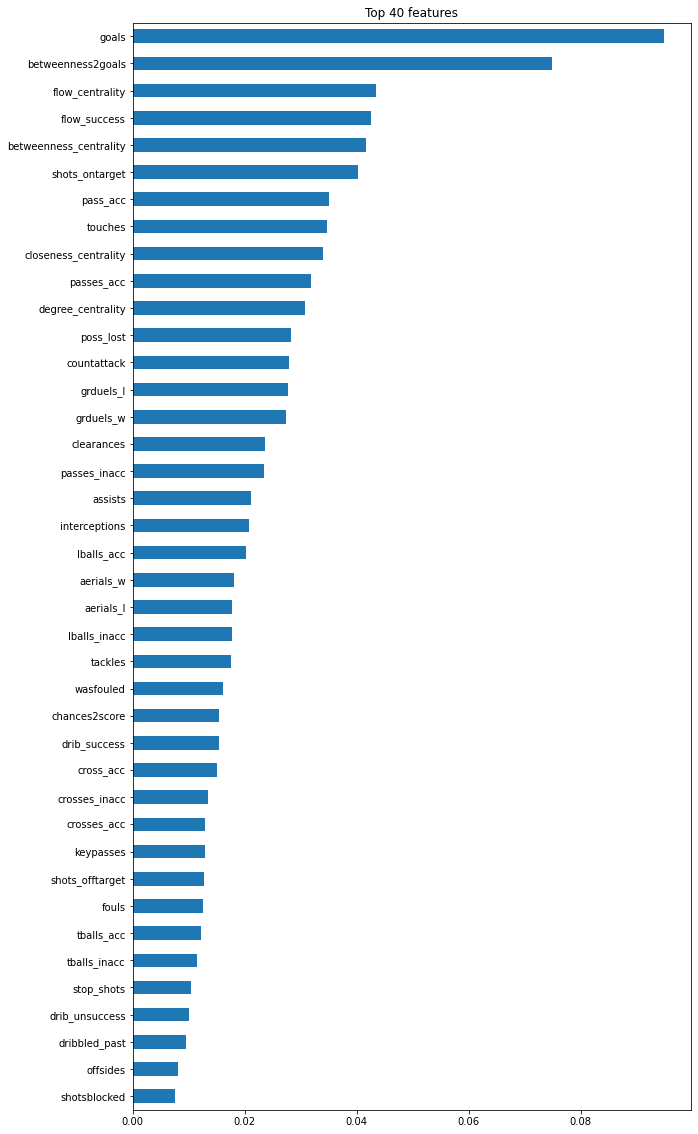

In [206]:
# 특성 중요도 시각화
end = pipe.named_steps['onehotencoder']
X_train_encoded = end.fit_transform(X_train)
rf = pipe.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train_encoded.columns)

%matplotlib inline
import matplotlib.pyplot as plt

n = 40
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

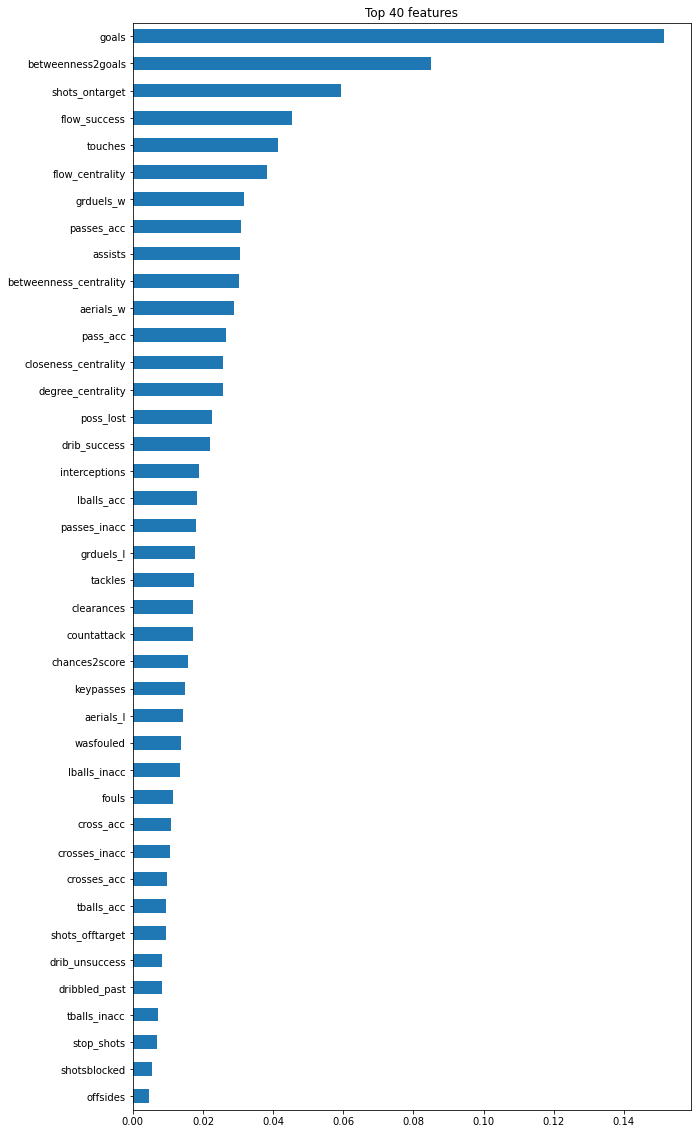

In [207]:
end = pipe1.named_steps['onehotencoder']
X_train_encoded_ai = end.fit_transform(X_train_ai)
rf = pipe1.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train_encoded_ai.columns)

%matplotlib inline
import matplotlib.pyplot as plt

n = 40
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

##XGBOOST

In [208]:
encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train) # 학습데이터
X_test_encoded = encoder.transform(X_test) # 검증데이터
X_val_encoded = encoder.transform(X_val)

encoder1 = OrdinalEncoder()
X_train_encoded_ai = encoder1.fit_transform(X_train_ai)
X_test_encoded_ai = encoder1.transform(X_test_ai)

model = XGBClassifier(
    n_estimators=1000,  # <= 1000 트리로 설정했지만, early stopping 에 따라 조절됩니다.
    max_depth=5,        # .
    learning_rate=0.2,
    #scale_pos_weight = 'ratio', # imbalance 데이터 일 경우 비율을 적용합니다.
    n_jobs=-1
)

eval_set = [(X_train_encoded, y_train), 
            (X_val_encoded, y_val)]

model.fit(X_train_encoded, y_train, 
          eval_set=eval_set,
          eval_metric='error', # #(wrong cases)/#(all cases)
          early_stopping_rounds = 50)

[0]	validation_0-error:0.067067	validation_1-error:0.076615
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 50 rounds.
[1]	validation_0-error:0.065494	validation_1-error:0.075472
[2]	validation_0-error:0.063778	validation_1-error:0.0749
[3]	validation_0-error:0.063492	validation_1-error:0.076043
[4]	validation_0-error:0.063206	validation_1-error:0.077187
[5]	validation_0-error:0.06292	validation_1-error:0.075472
[6]	validation_0-error:0.059631	validation_1-error:0.074328
[7]	validation_0-error:0.059488	validation_1-error:0.075472
[8]	validation_0-error:0.05863	validation_1-error:0.076043
[9]	validation_0-error:0.057629	validation_1-error:0.0749
[10]	validation_0-error:0.057057	validation_1-error:0.074328
[11]	validation_0-error:0.057057	validation_1-error:0.074328
[12]	validation_0-error:0.05577	validation_1-error:0.073756
[13]	validation_0-error:0.055055	validation_1-error:0.073185
[1

XGBClassifier(learning_rate=0.2, max_depth=5, n_estimators=1000, n_jobs=-1)

In [209]:
encoder1 = OrdinalEncoder()
X_train_encoded_ai = encoder1.fit_transform(X_train_ai)
X_test_encoded_ai = encoder1.transform(X_test_ai)
X_val_encoded_ai = encoder1.transform(X_val_ai)

model_ai = XGBClassifier(
    n_estimators=1000,  # <= 1000 트리로 설정했지만, early stopping 에 따라 조절됩니다.
    max_depth=5,        # .
    learning_rate=0.2,
    #scale_pos_weight = 'ratio', # imbalance 데이터 일 경우 비율을 적용합니다.
    n_jobs=-1
)

eval_set_ai = [(X_train_encoded_ai, y_train_ai), 
            (X_val_encoded_ai, y_val_ai)]

model_ai.fit(X_train_encoded_ai, y_train_ai, 
          eval_set=eval_set_ai,
          eval_metric='error', # #(wrong cases)/#(all cases)
          early_stopping_rounds = 50)

[0]	validation_0-error:0.039343	validation_1-error:0.041252
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 50 rounds.
[1]	validation_0-error:0.040054	validation_1-error:0.042105
[2]	validation_0-error:0.039129	validation_1-error:0.041252
[3]	validation_0-error:0.038133	validation_1-error:0.039545
[4]	validation_0-error:0.037493	validation_1-error:0.040683
[5]	validation_0-error:0.037137	validation_1-error:0.039829
[6]	validation_0-error:0.036781	validation_1-error:0.039829
[7]	validation_0-error:0.035501	validation_1-error:0.040683
[8]	validation_0-error:0.034291	validation_1-error:0.040114
[9]	validation_0-error:0.034007	validation_1-error:0.039545
[10]	validation_0-error:0.03358	validation_1-error:0.038691
[11]	validation_0-error:0.032797	validation_1-error:0.038691
[12]	validation_0-error:0.032726	validation_1-error:0.038691
[13]	validation_0-error:0.032513	validation_1-error:0.039

XGBClassifier(learning_rate=0.2, max_depth=5, n_estimators=1000, n_jobs=-1)

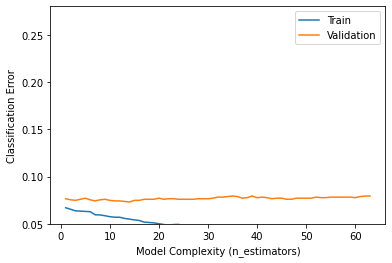

In [210]:
results = model.evals_result()
train_error = results['validation_0']['error']
test_error = results['validation_1']['error']

epoch = range(1, len(train_error)+1)
plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, test_error, label='Validation')
plt.ylabel('Classification Error')
plt.xlabel('Model Complexity (n_estimators)')
plt.ylim((0.05, 0.28)) # Zoom in
plt.legend();

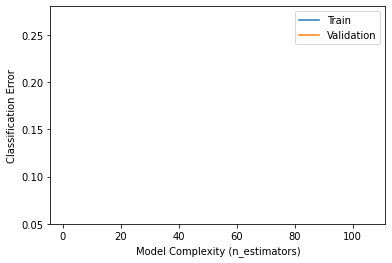

In [211]:
results = model_ai.evals_result()
train_error = results['validation_0']['error']
test_error = results['validation_1']['error']

epoch = range(1, len(train_error)+1)
plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, test_error, label='Validation')
plt.ylabel('Classification Error')
plt.xlabel('Model Complexity (n_estimators)')
plt.ylim((0.05, 0.28)) # Zoom in
plt.legend();

In [212]:
from sklearn.metrics import classification_report

print('훈련 정확도', model.score(X_train_encoded, y_train))
print('검증 정확도', model.score(X_val_encoded, y_val))

print(classification_report(y_val, model.predict(X_val_encoded)))

print('AI')
print('훈련 정확도', model_ai.score(X_train_encoded_ai, y_train_ai))
print('검증 정확도', model_ai.score(X_val_encoded_ai, y_val_ai))

print(classification_report(y_test_ai, model_ai.predict(X_test_encoded_ai)))


print('랜덤포레스트 모델보다 검증 정확도 증가.')

훈련 정확도 0.944944944944945
검증 정확도 0.9268153230417381
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1602
           1       0.66      0.27      0.38       147

    accuracy                           0.93      1749
   macro avg       0.80      0.63      0.67      1749
weighted avg       0.91      0.93      0.91      1749

AI
훈련 정확도 0.9833523050654525
검증 정확도 0.9641536273115221
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4135
           1       0.75      0.50      0.60       258

    accuracy                           0.96      4393
   macro avg       0.86      0.75      0.79      4393
weighted avg       0.96      0.96      0.96      4393

랜덤포레스트 모델보다 검증 정확도 증가.


In [213]:
print('테스트 정확도', model.score(X_test_encoded, y_test))
print('AI테스트 정확도', model_ai.score(X_test_encoded_ai, y_test_ai))

테스트 정확도 0.929551692589204
AI테스트 정확도 0.9610744366036876


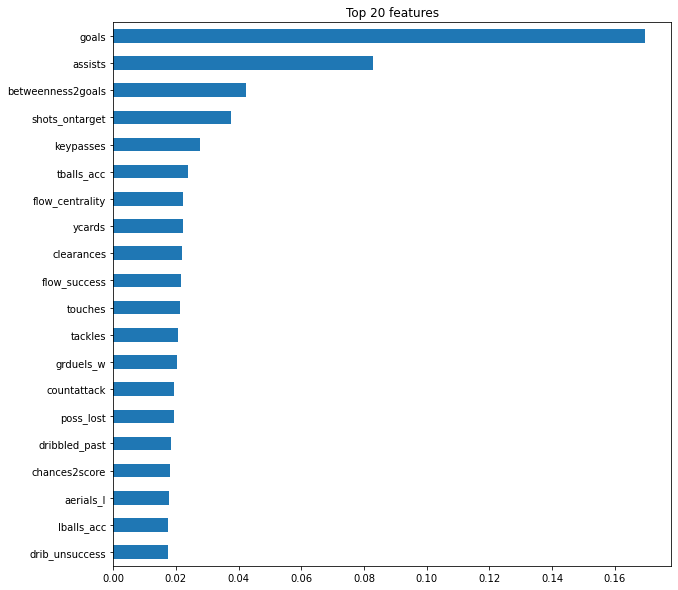

In [214]:
n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')


importances = pd.Series(model.feature_importances_, X_train_encoded.columns)
importances.sort_values(ascending = True)[-n:].plot.barh();

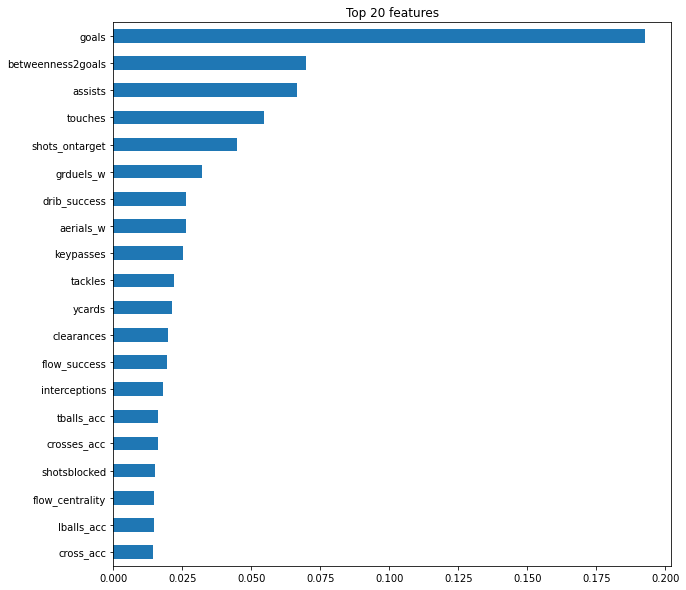

In [215]:
n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')

importances_ai = pd.Series(model_ai.feature_importances_, X_train_encoded_ai.columns)
importances_ai.sort_values(ascending = True)[-n:].plot.barh();

In [216]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Permutation

In [217]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

In [218]:
# permuter 정의
permuter = PermutationImportance(
    model, # model
    scoring='accuracy', # metric
    n_iter=10, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)


# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_train_encoded, y_train);
feature_names = X_train_encoded.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending = False)

goals                     0.035350
betweenness2goals         0.009967
assists                   0.007264
flow_centrality           0.006707
shots_ontarget            0.003661
grduels_w                 0.002131
cross_acc                 0.002088
flow_success              0.002059
countattack               0.001773
keypasses                 0.001702
pass_acc                  0.001530
tballs_acc                0.001530
chances2score             0.001359
betweenness_centrality    0.001359
drib_success              0.001015
degree_centrality         0.000944
closeness_centrality      0.000844
clearances                0.000801
aerials_w                 0.000758
interceptions             0.000686
touches                   0.000672
tackles                   0.000572
poss_lost                 0.000558
wasfouled                 0.000543
passes_acc                0.000543
lballs_acc                0.000501
crosses_acc               0.000415
crosses_inacc             0.000229
tballs_inacc        

In [219]:
# permuter 정의
permuter_ai = PermutationImportance(
    model_ai, # model
    scoring='accuracy', # metric
    n_iter=10, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)


# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter_ai.fit(X_train_encoded_ai, y_train_ai);
feature_names = X_train_encoded_ai.columns.tolist()
pd.Series(permuter_ai.feature_importances_, feature_names).sort_values(ascending = False)

goals                     0.037450
touches                   0.014421
shots_ontarget            0.009604
betweenness2goals         0.009291
assists                   0.008715
grduels_w                 0.007876
aerials_w                 0.007093
flow_success              0.005649
drib_success              0.005151
flow_centrality           0.003123
betweenness_centrality    0.002960
tackles                   0.002931
keypasses                 0.002789
pass_acc                  0.002490
interceptions             0.002298
closeness_centrality      0.002028
clearances                0.001771
shots_offtarget           0.001651
cross_acc                 0.001643
ycards                    0.001259
countattack               0.001131
passes_acc                0.001060
tballs_acc                0.001046
poss_lost                 0.001039
aerials_l                 0.001003
lballs_inacc              0.000968
passes_inacc              0.000953
lballs_acc                0.000911
grduels_l           

In [220]:
eli5.show_weights(
    permuter, 
    top=20, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
0.0353 ± 0.0022,goals
0.0100 ± 0.0012,betweenness2goals
0.0073 ± 0.0007,assists
0.0067 ± 0.0015,flow_centrality
0.0037 ± 0.0006,shots_ontarget
0.0021 ± 0.0006,grduels_w
0.0021 ± 0.0004,cross_acc
0.0021 ± 0.0009,flow_success
0.0018 ± 0.0007,countattack
0.0017 ± 0.0006,keypasses


In [221]:
eli5.show_weights(
    permuter_ai, 
    top=20, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
0.0375 ± 0.0015,goals
0.0144 ± 0.0016,touches
0.0096 ± 0.0010,shots_ontarget
0.0093 ± 0.0007,betweenness2goals
0.0087 ± 0.0009,assists
0.0079 ± 0.0011,grduels_w
0.0071 ± 0.0013,aerials_w
0.0056 ± 0.0011,flow_success
0.0052 ± 0.0007,drib_success
0.0031 ± 0.0009,flow_centrality


In [222]:
minimum_importance = 0.001
mask = permuter.feature_importances_ > minimum_importance
features = X_train.columns[mask]
X_train_selected = X_train_encoded[features]
X_test_selected = X_test_encoded[features]
X_val_selected = X_val_encoded[features]

In [223]:
eval_set = [(X_train_selected, y_train), 
            (X_val_selected, y_val)]

model1 = XGBClassifier(
    n_estimators=1000,  # <= 1000 트리로 설정했지만, early stopping 에 따라 조절됩니다.
    max_depth=5,        # .
    learning_rate=0.2,
    #scale_pos_weight = 'ratio', # imbalance 데이터 일 경우 비율을 적용합니다.
    n_jobs=-1
)

model1.fit(X_train_selected, y_train, 
          eval_set=eval_set,
          eval_metric='error', # #(wrong cases)/#(all cases)
          early_stopping_rounds = 50)

print('검증 정확도', model1.score(X_val_selected, y_val))

print(classification_report(y_val, model1.predict(X_val_selected)))

print('피쳐 셀렉트 후 검증정확도가 낮아짐.')

[0]	validation_0-error:0.067639	validation_1-error:0.074328
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 50 rounds.
[1]	validation_0-error:0.066352	validation_1-error:0.0749
[2]	validation_0-error:0.065065	validation_1-error:0.072613
[3]	validation_0-error:0.064493	validation_1-error:0.074328
[4]	validation_0-error:0.065065	validation_1-error:0.073756
[5]	validation_0-error:0.063635	validation_1-error:0.072613
[6]	validation_0-error:0.063349	validation_1-error:0.073756
[7]	validation_0-error:0.061204	validation_1-error:0.072041
[8]	validation_0-error:0.059631	validation_1-error:0.072041
[9]	validation_0-error:0.058916	validation_1-error:0.073185
[10]	validation_0-error:0.058773	validation_1-error:0.073756
[11]	validation_0-error:0.057915	validation_1-error:0.074328
[12]	validation_0-error:0.057915	validation_1-error:0.0749
[13]	validation_0-error:0.057343	validation_1-error:0.0749
[

In [224]:
minimum_importance = 0.001
mask_ai = permuter_ai.feature_importances_ > minimum_importance
features_ai = X_train_ai.columns[mask_ai]
X_train_selected_ai = X_train_encoded_ai[features]
X_test_selected_ai = X_test_encoded_ai[features]
X_val_selected_ai = X_val_encoded_ai[features]

In [225]:
eval_set = [(X_train_selected_ai, y_train_ai), 
            (X_val_selected_ai, y_val_ai)]

model1_ai = XGBClassifier(
    n_estimators=1000,  # <= 1000 트리로 설정했지만, early stopping 에 따라 조절됩니다.
    max_depth=5,        # .
    learning_rate=0.2,
    #scale_pos_weight = 'ratio', # imbalance 데이터 일 경우 비율을 적용합니다.
    n_jobs=-1
)

model1_ai.fit(X_train_selected_ai, y_train_ai, 
          eval_set=eval_set,
          eval_metric='error', # #(wrong cases)/#(all cases)
          early_stopping_rounds = 50)

print('검증 정확도', model1_ai.score(X_val_selected_ai, y_val_ai))

print(classification_report(y_val_ai, model1_ai.predict(X_val_selected_ai)))

print('피쳐 셀렉트 후 검증정확도가 낮아짐.')

[0]	validation_0-error:0.040766	validation_1-error:0.044381
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 50 rounds.
[1]	validation_0-error:0.039912	validation_1-error:0.043243
[2]	validation_0-error:0.039627	validation_1-error:0.042959
[3]	validation_0-error:0.038916	validation_1-error:0.041252
[4]	validation_0-error:0.037351	validation_1-error:0.040114
[5]	validation_0-error:0.037991	validation_1-error:0.039545
[6]	validation_0-error:0.037635	validation_1-error:0.040114
[7]	validation_0-error:0.036639	validation_1-error:0.040398
[8]	validation_0-error:0.036568	validation_1-error:0.039829
[9]	validation_0-error:0.035857	validation_1-error:0.040114
[10]	validation_0-error:0.035074	validation_1-error:0.038407
[11]	validation_0-error:0.034576	validation_1-error:0.039545
[12]	validation_0-error:0.034434	validation_1-error:0.039829
[13]	validation_0-error:0.03422	validation_1-error:0.039

#PDP

In [226]:
!pip install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [227]:
X_train['degree_centrality']

44230    1.200000
42695    1.333333
14619    1.400000
24663    1.133333
46505    1.714286
           ...   
24144    1.333333
6486     0.214286
33928    1.615385
11728    1.307692
4127     1.142857
Name: degree_centrality, Length: 6993, dtype: float64

In [228]:
print('human')
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

human


Weight,Feature
0.0353 ± 0.0022,goals
0.0100 ± 0.0012,betweenness2goals
0.0073 ± 0.0007,assists
0.0067 ± 0.0015,flow_centrality
0.0037 ± 0.0006,shots_ontarget
0.0021 ± 0.0006,grduels_w
0.0021 ± 0.0004,cross_acc
0.0021 ± 0.0009,flow_success
0.0018 ± 0.0007,countattack
0.0017 ± 0.0006,keypasses


In [229]:
print('AI')
eli5.show_weights(
    permuter_ai, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

AI


Weight,Feature
0.0375 ± 0.0015,goals
0.0144 ± 0.0016,touches
0.0096 ± 0.0010,shots_ontarget
0.0093 ± 0.0007,betweenness2goals
0.0087 ± 0.0009,assists
0.0079 ± 0.0011,grduels_w
0.0071 ± 0.0013,aerials_w
0.0056 ± 0.0011,flow_success
0.0052 ± 0.0007,drib_success
0.0031 ± 0.0009,flow_centrality


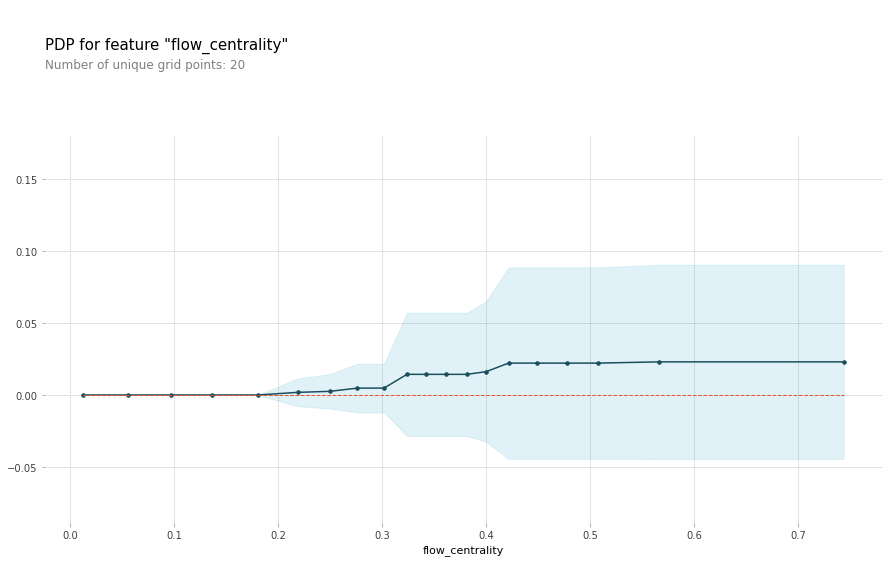

In [230]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'flow_centrality'

isolated = pdp_isolate(
    model=model, 
    dataset=X_test_encoded, 
    model_features=X_test_encoded.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=20 # default=10
)
pdp_plot(isolated, feature_name=feature);

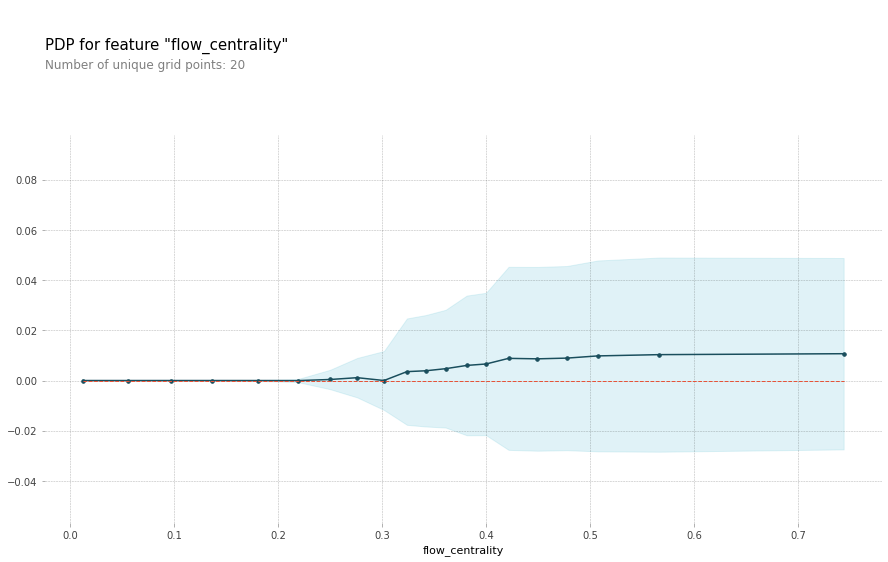

In [231]:
#ai
feature = 'flow_centrality'

isolated = pdp_isolate(
    model=model_ai, 
    dataset=X_test_encoded, 
    model_features=X_test_encoded_ai.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=20 # default=10
)
pdp_plot(isolated, feature_name=feature);

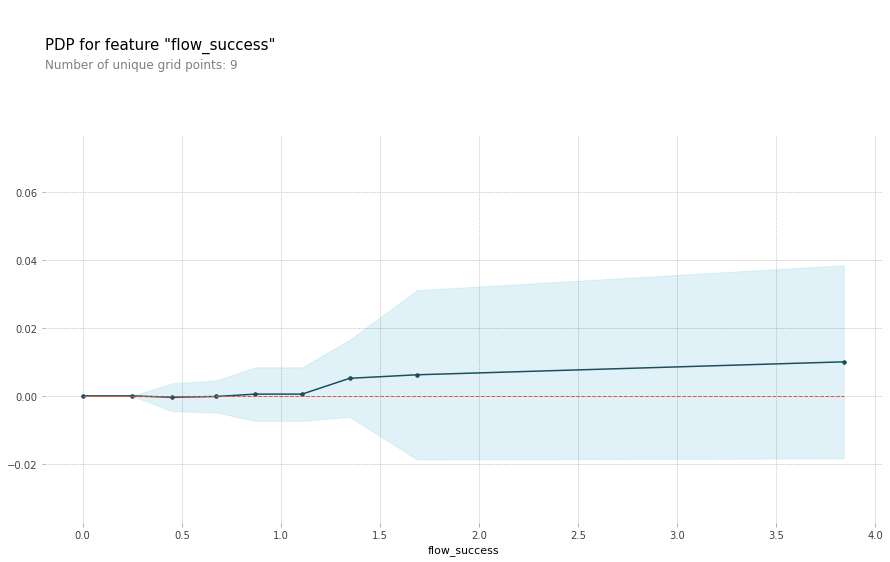

In [232]:
#human
feature = 'flow_success'

isolated = pdp_isolate(
    model=model, 
    dataset=X_test_encoded, 
    model_features=X_test_encoded.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

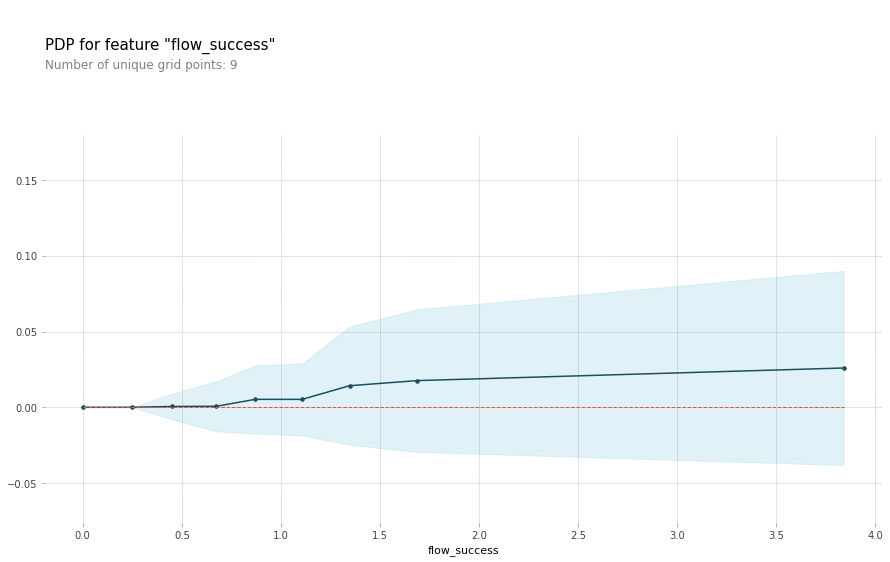

In [233]:
#ai
feature = 'flow_success'

isolated = pdp_isolate(
    model=model_ai, 
    dataset=X_test_encoded, 
    model_features=X_test_encoded_ai.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

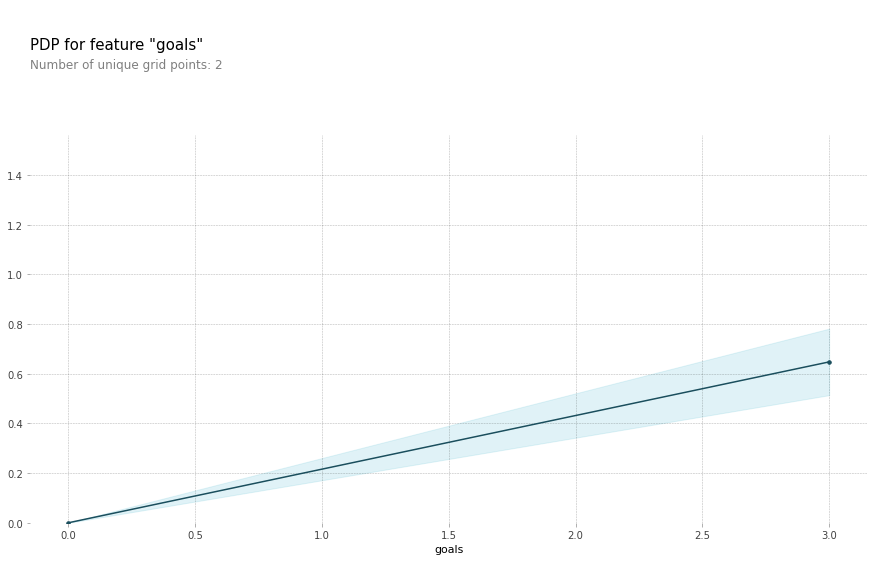

In [234]:
feature = 'goals'

isolated = pdp_isolate(
    model=model, 
    dataset=X_test_encoded, 
    model_features=X_test_encoded.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

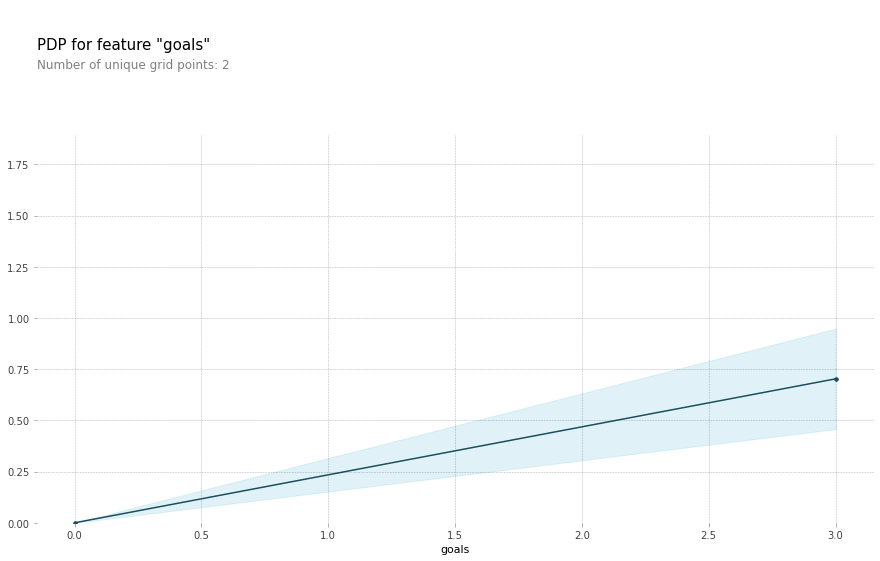

In [235]:
#ai
feature = 'goals'

isolated = pdp_isolate(
    model=model_ai, 
    dataset=X_test_encoded, 
    model_features=X_test_encoded_ai.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

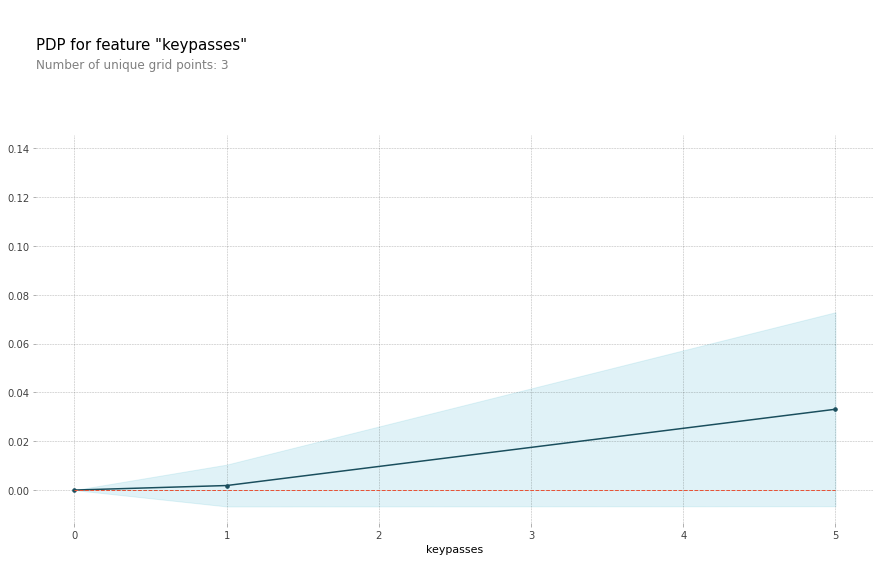

In [236]:
feature = 'keypasses'

isolated = pdp_isolate(
    model=model, 
    dataset=X_test_encoded, 
    model_features=X_test_encoded.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

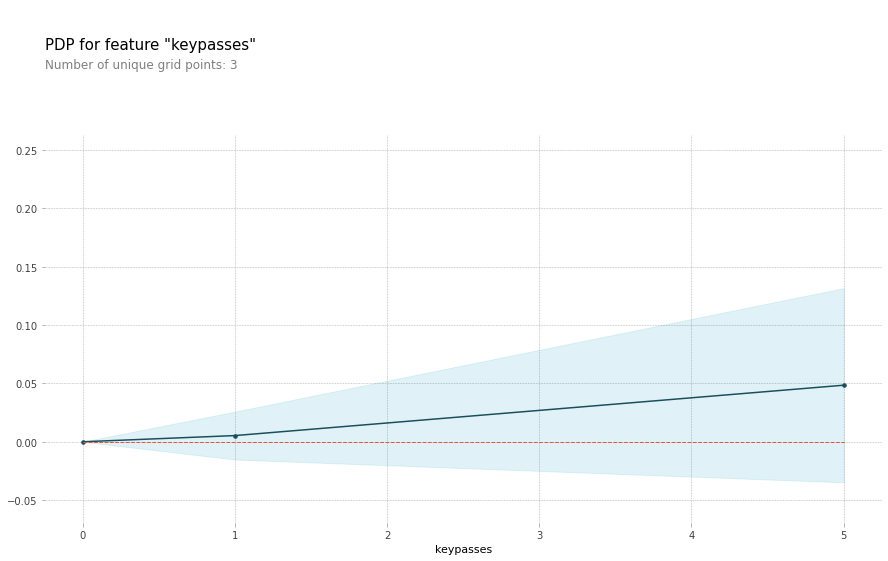

In [237]:
#ai
feature = 'keypasses'

isolated = pdp_isolate(
    model=model_ai, 
    dataset=X_test_encoded, 
    model_features=X_test_encoded_ai.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

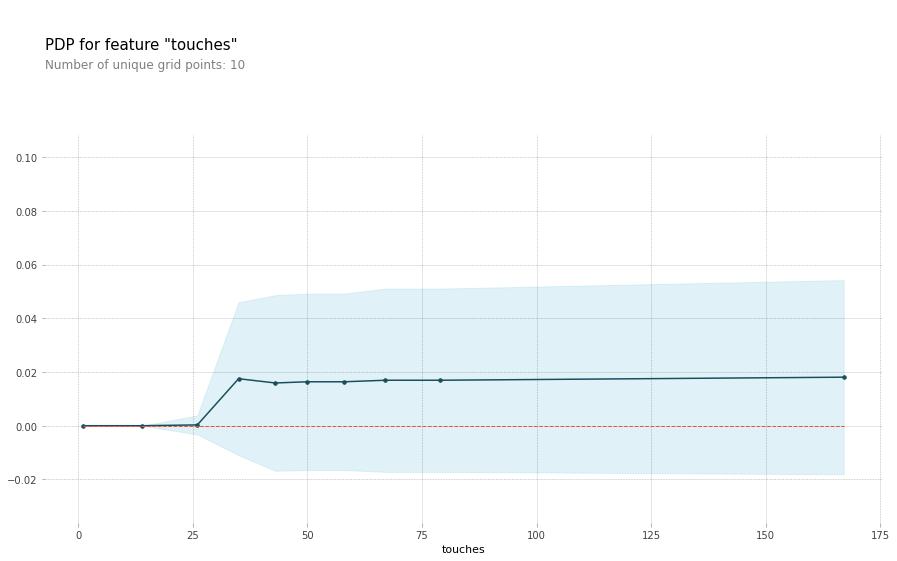

In [238]:
feature = 'touches'

isolated = pdp_isolate(
    model=model, 
    dataset=X_test_encoded, 
    model_features=X_test_encoded.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

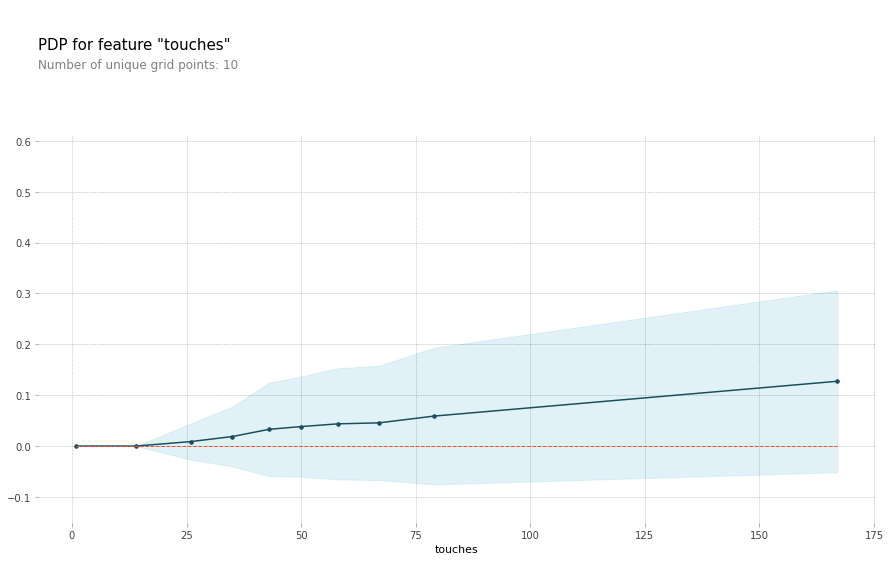

In [239]:
#ai
feature = 'touches'

isolated = pdp_isolate(
    model=model_ai, 
    dataset=X_test_encoded, 
    model_features=X_test_encoded_ai.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

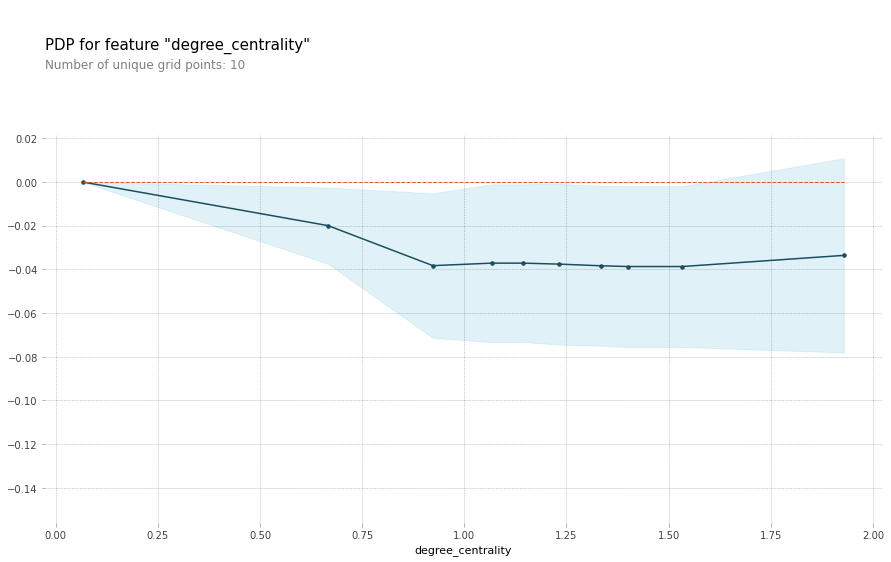

In [240]:
feature = 'degree_centrality'

isolated = pdp_isolate(
    model=model, 
    dataset=X_test_encoded, 
    model_features=X_test_encoded.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

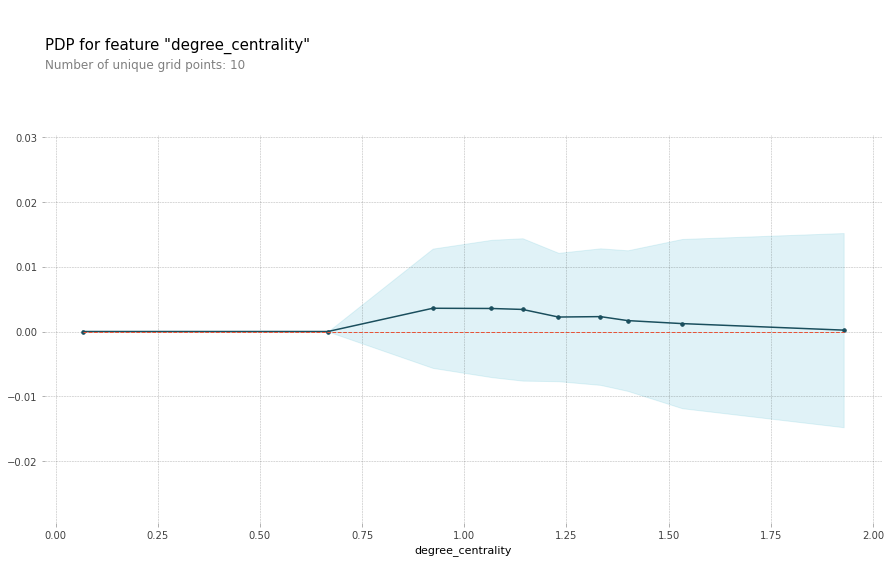

In [241]:
#ai
feature = 'degree_centrality'

isolated = pdp_isolate(
    model=model_ai, 
    dataset=X_test_encoded, 
    model_features=X_test_encoded_ai.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

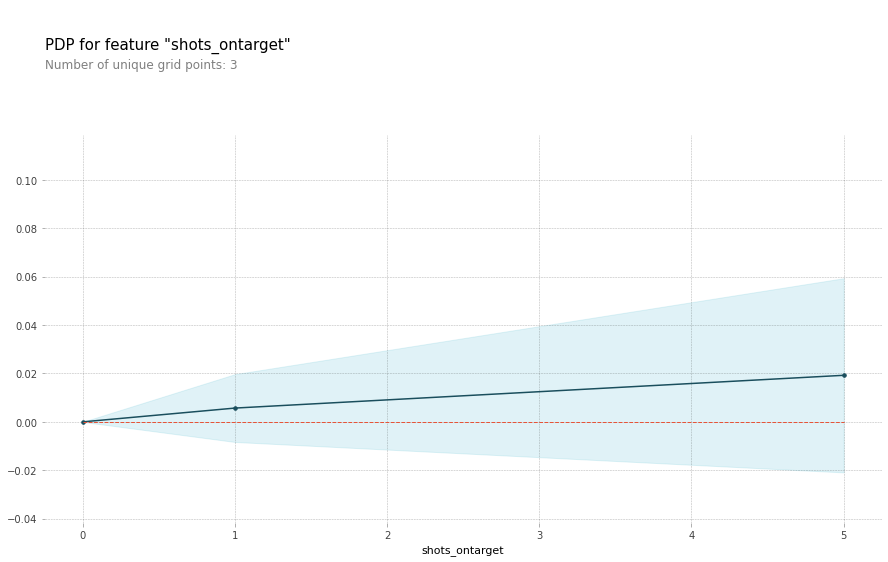

In [242]:
feature = 'shots_ontarget'

isolated = pdp_isolate(
    model=model, 
    dataset=X_test_encoded, 
    model_features=X_test_encoded.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

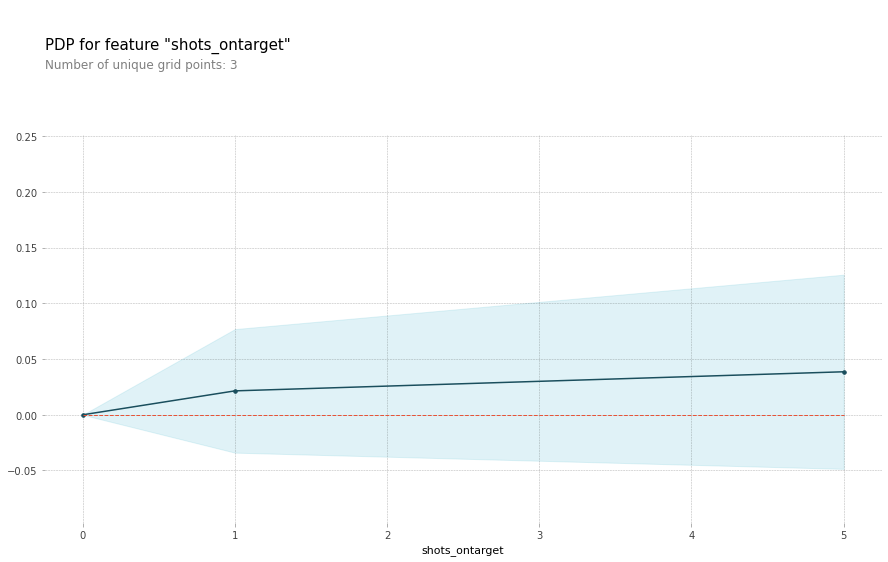

In [243]:
#ai
feature = 'shots_ontarget'

isolated = pdp_isolate(
    model=model_ai, 
    dataset=X_test_encoded, 
    model_features=X_test_encoded_ai.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

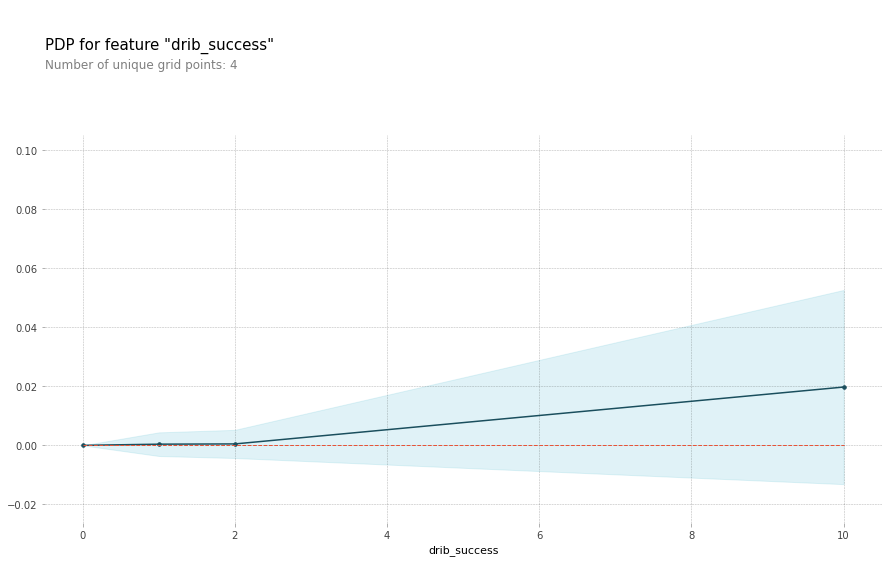

In [244]:
feature = 'drib_success'

isolated = pdp_isolate(
    model=model, 
    dataset=X_test_encoded, 
    model_features=X_test_encoded.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

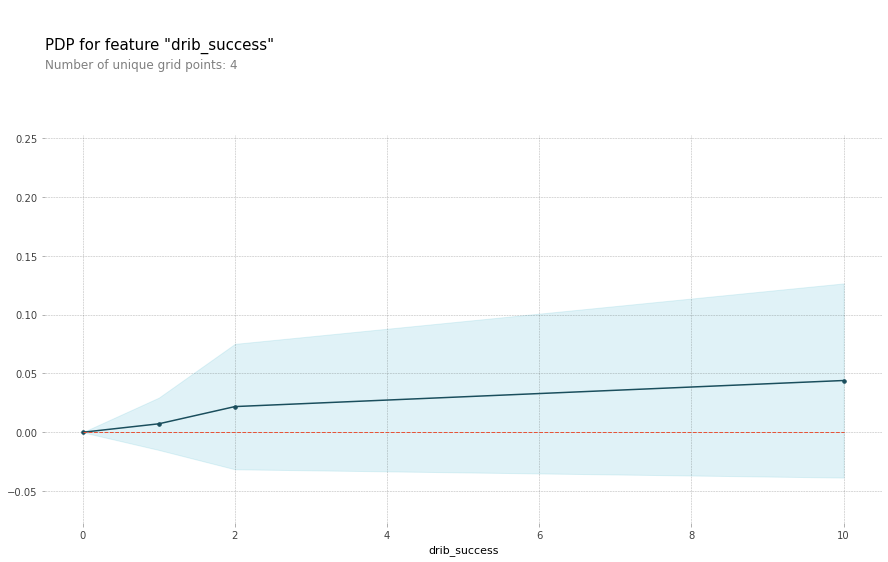

In [245]:
#ai
feature = 'drib_success'

isolated = pdp_isolate(
    model=model_ai, 
    dataset=X_test_encoded, 
    model_features=X_test_encoded_ai.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

In [246]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

In [247]:
features = ['flow_centrality', 'touches']

interaction = pdp_interact(
    model=model_ai, 
    dataset=X_test_encoded_ai,
    model_features=X_test_encoded.columns, 
    features=features
)

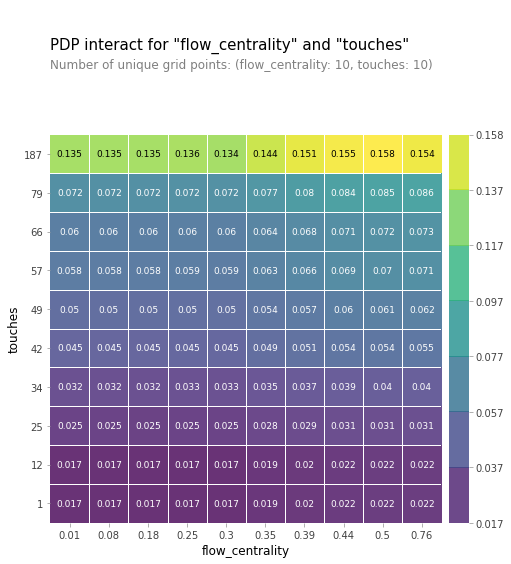

In [248]:
pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

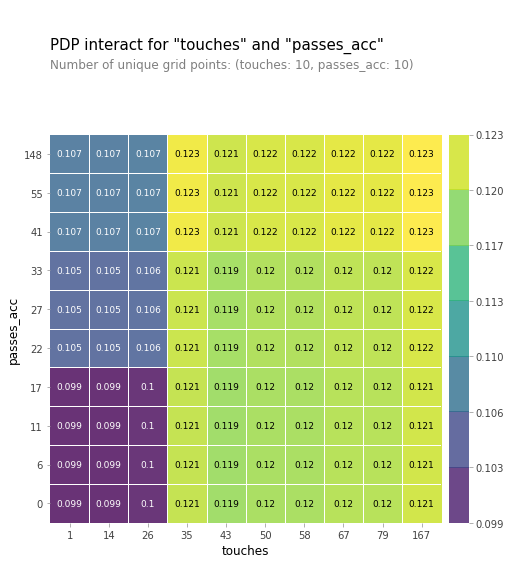

In [249]:
features = ['touches','passes_acc']

interaction = pdp_interact(
    model=model, 
    dataset=X_test_encoded,
    model_features=X_test_encoded.columns, 
    features=features
)
pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

# SHAP

In [250]:
row = X_test_encoded.iloc[[1]]
row

,goals,assists,shots_ontarget,shots_offtarget,shotsblocked,chances2score,drib_success,drib_unsuccess,keypasses,touches,...,missed_penalties,owngoals,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,flow_success,betweenness2goals,pass_acc,cross_acc
21202,0,0,0,2,0,2,3,0,0,10,...,0,0,0.266667,0.062994,0.466667,0.04,0.6,0.25,0.0,0.0


In [251]:
y_test.iloc[[1]]

21202    0
Name: Grade, dtype: category
Categories (2, int64): [0 < 1]

In [252]:
model.predict(row)

array([0])

In [253]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [254]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.fit_transform(y_test)

le.classes_

array([0, 1])

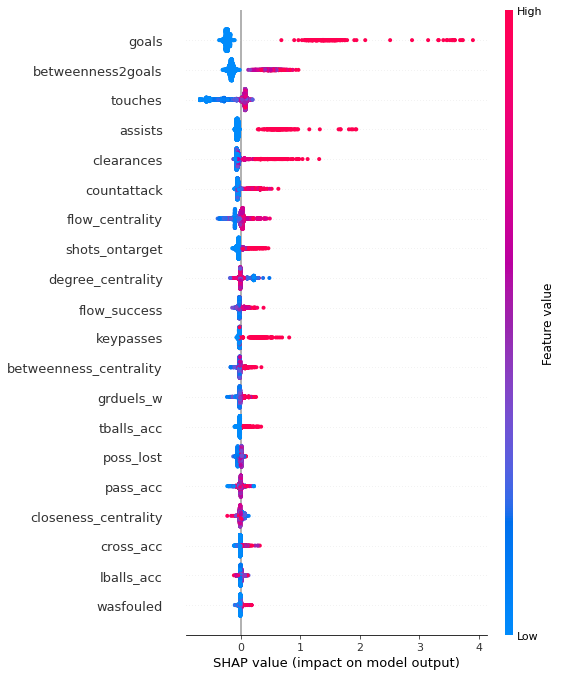

In [257]:
import shap


explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_test)#.iloc[])
shap.summary_plot(shap_values, X_test)#.iloc[:500])

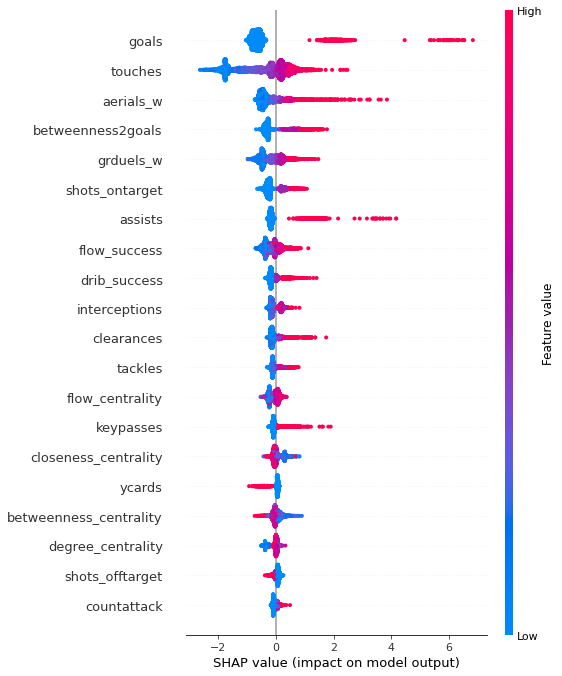

In [258]:
import shap


explainer = shap.TreeExplainer(model_ai)

shap_values = explainer.shap_values(X_test_ai)#.iloc[:500])
shap.summary_plot(shap_values, X_test_ai)#.iloc[:500])